<a href="https://colab.research.google.com/github/norgel/Analysis-of-Stroke-Patients/blob/main/Patient_Analysis_of_Stroke_Pre_Post_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Nicholas Orgel

Date Started: 11/02/2022

Last Editorial Date: 11/17/2022

Dataset Aquired from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

- This is a classification dataset that has the task of identifying whether or not a person has had a stroke.
---
## **Description:**
- Excerpt from the dataset description: "According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient."

---

## **Tasks:**

- Deleted unnecessay columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

---

#**Data Dictionary**


Column Name | Description
---|---
id | Unique identifier
gender| 'Male', 'Female', or 'Other'
age| Age of the patient
hypertension | 0 if patient doesn't have hypertension, 1 if the patient has hypertension
ever_married | 'No' or 'Yes'
work_type | 'children', 'govt_job', 'never_worked', 'private', or 'self-employed'
Residence_type | 'Rural' or 'Urban'
avg_glucose_level | average glucose level in blood
bmi | body mass index
smoking_status | 'formerly smoke', 'never smoked', 'smokes', or 'unknown'
stroke | 1 if the patient had a stroke or 0 if not

## **Import Libraries**

In [156]:
# Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

# Pipeline Display
from sklearn import set_config
set_config(display='diagram')

## **Load Dataset Head**

In [157]:
data = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [158]:
display(df.columns)
print(df.shape)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

(5110, 12)


This is the list of columns that are present in the dataset. In my opinion, the 'id' column is not needed because it is vague and not categorized in a way that can be compared to the other columns.

In the current dataset that is present, there is `5,110 rows and 12 columns`. This will be reduced to 11 columns because `'id'` is an unnecessary column.

---

I will make a copy of the data in order to enact all the changes.

### **Data Copy**

In [159]:
# Make a copy of the base dataset that is used for changes.
exp_df = df.copy()
ml_df = df.copy()

In [160]:
# Delete the unnecessary 'id' column from both copies of the original dataset (exp_df & ml_df)
exp_df = exp_df.drop(columns='id', axis=1)
ml_df = ml_df.drop(columns='id', axis=1)
exp_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [161]:
# Checking for duplicates in the dataset
exp_df.duplicated().sum()

0

In [162]:
# Checking for missing values in the dataset
exp_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are **no duplicates** present in the dataset, but there is **201 missing values in the 'bmi'** column.

In [163]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


There is **3 float datatypes**, **3 integer datatypes**, and **5 object datatypes**.

---

### **Identify Categorical Values**

In [164]:
exp_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [165]:
exp_df = exp_df[~(exp_df['gender']=='Other')]

#### **gender Ordinal Encoding**

In [211]:
exp_df['gender'].replace({'Female': 0,
                         'Male': 1}, inplace=True)

In [212]:
exp_df['gender'].value_counts()

0    2994
1    2115
Name: gender, dtype: int64

There seems to be no inconsistencies with this column.

---

In [213]:
exp_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

There is a lot of inconsistencies and outliers in this data column. It can be better visualized in a boxplot.

Some values, like **0.08 do not make sense**, this would make sense if it were 8.00 years of age.

---

In [214]:
exp_df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

There is no visible inconsistencies.
- 0 means the patient **does not have** hypertension.
- 1 means the patient **has** hypertension.
---

In [215]:
exp_df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

There is no visible inconsistencies.
- 0 means the patient **does not have** heart disease.
- 1 means the patient **has** heart disease.
---

In [216]:
exp_df['ever_married'].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

In [217]:
exp_df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)

In [218]:
exp_df['ever_married'].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

There is no visible inconsistencies.

- This column can be ordinal encoded.
---

In [219]:
exp_df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [220]:
exp_df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

There is no visible inconsistencies.

- This column can be ordinal encoded.

---

In [221]:
exp_df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

There is no visible inconsistencies.

- This column can be ordinal encoded.

---

In [222]:
exp_df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64

There are no visible inconsistencies.

---

In [223]:
exp_df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

There is no visible inconsistencies.

- But there is still 201 missing values in this column.
---

In [224]:
exp_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

No visible inconsistencies.

- Can be ordinal encoded.

---

In [225]:
exp_df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

- 0 means the patient has not had a stroke.
- 1 means the patient has had a stroke.

There is no visible inconsistencies.

---

# **Univariate Visualizations**

For target (y) and features (X)

- Target (y) is ['stroke']
- Features (X) are everything else.
---

#### **gender**

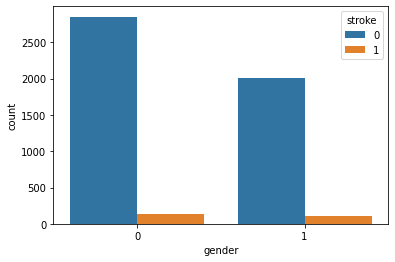

In [181]:
sns.countplot(x='gender', data=exp_df, hue='stroke');

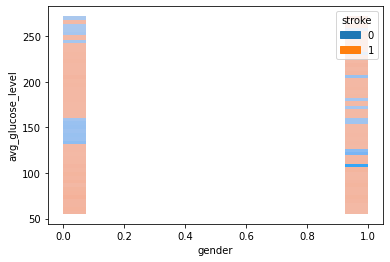

In [182]:
sns.histplot(x='gender', y= 'avg_glucose_level', data = exp_df, hue='stroke');

**Base Model**
- There is only a minimum line in the base gender boxplot for those whose gender is unknown or "other".

**Combined Model**
- You can see that there are numerous outliers on both the Male/Female genders around the 200 glucose level.

---

#### **age**

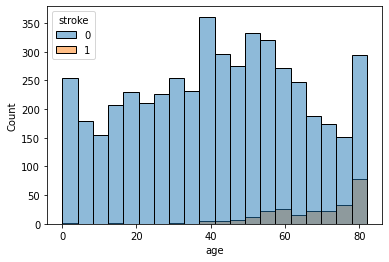

In [183]:

sns.histplot(x='age', data = exp_df, hue='stroke');

AxesSubplot(0.125,0.125;0.775x0.755)


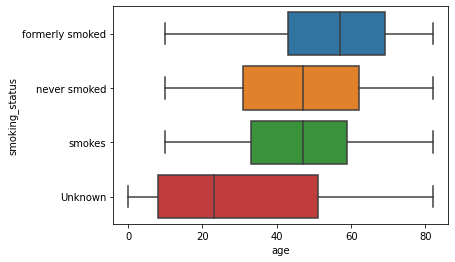

In [184]:
print(sns.boxplot(x='age', y='smoking_status', data = exp_df));

**Base Model**
- There are no outliers on the age column on it's own. 

**Combined Model**
- When tracking smoking status based on age. There is a larger majority of people that have formerly smoked around the ages of 40-70.

---

#### **hypertension**

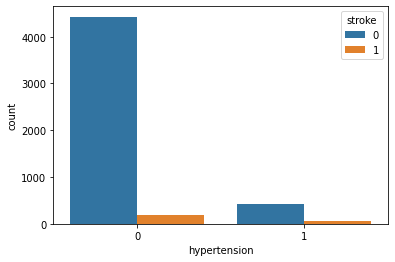

In [185]:
sns.countplot(x='hypertension', data=exp_df, hue='stroke');

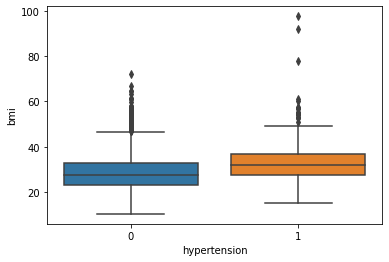

In [186]:
sns.boxplot(x='hypertension', y='bmi', data=exp_df);

**Base Model**
- In the base boxplot, the only outliers in the hypertension column are 1. Which is for patients that **do have hypertension**.

**Combined Model**
- In the boxplot that **compares 'hypertension' and 'bmi'**, there are bigger outliers for those that **do have hypertension with a BMI between 55-100**.

---

#### **heart_disease**

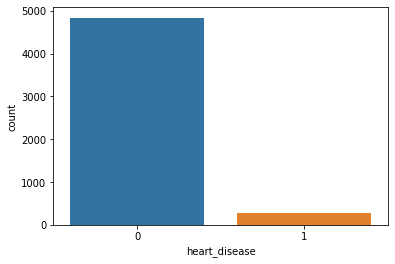

In [187]:
sns.countplot(x='heart_disease', data=exp_df);

In [188]:
exp_df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

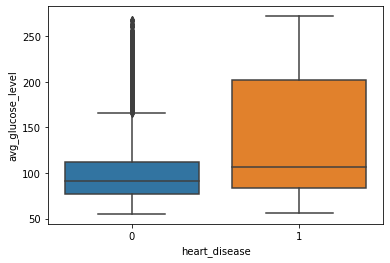

In [189]:
sns.boxplot(x='heart_disease', y='avg_glucose_level', data=exp_df);

**Base Model**
- In the base boxplot model, the only outliers are for those that do have heart disease.

**Combined Model**
- In the boxplot comparing heart disease and average glucose level. The only outliers are for patients that **did not have heart disease** & **had an avg. glucose level between 175-250**.

---

#### **ever_married**

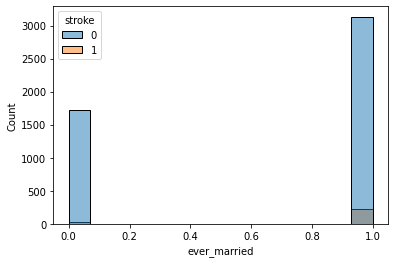

In [253]:
sns.histplot(x='ever_married', data=exp_df, hue='stroke')
plt.title(f'{');

**Base Model**
- In the base boxplot model, there is no outliers present.
---

#### **work_type**

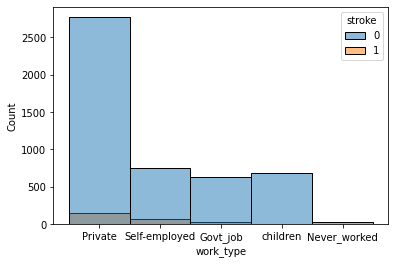

In [191]:
sns.histplot(x='work_type', data=exp_df, hue='stroke');

In [192]:
exp_df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

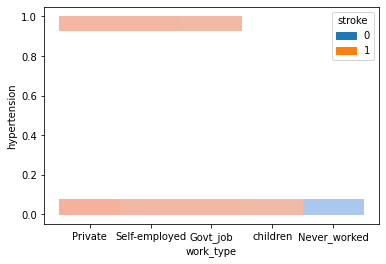

In [193]:
sns.histplot(x='work_type', y='hypertension', data=exp_df, hue='stroke');

**Base Model**
- There are no outliers

**Combined Model**
- There are outliers for people that **have hypertension** that work in either **the Private Sector (0), Self-employed (1), or work a Government Job (3).**

---

#### **Residence_type**

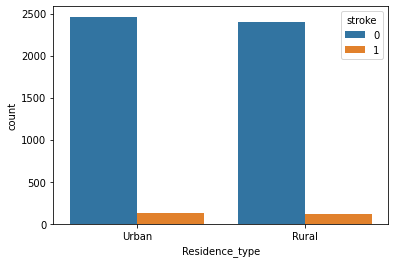

In [194]:
sns.countplot(x='Residence_type', data=exp_df, hue='stroke');

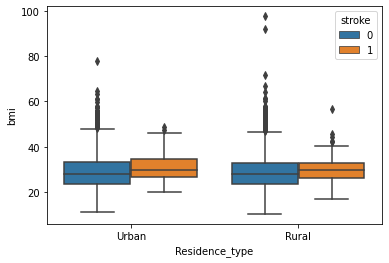

In [195]:
sns.boxplot(x='Residence_type', y='bmi',
            data=exp_df, hue='stroke');

**Base Model**
- There are no outliers present in the base model.

**Combined Model**
- In the combined model comparing Residence type and bmi, there are outliers present in both "Urban" and "Rural" residencies. But there appears to be more in the 'Rural' residence type.

---

#### **avg_glucose_level**

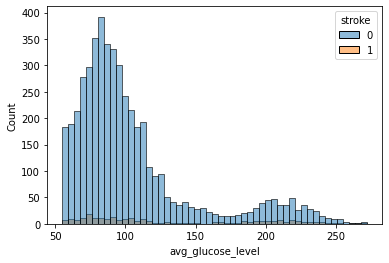

In [196]:
sns.histplot(x='avg_glucose_level', data=exp_df, hue='stroke');

**Base Model**
- There is a massive amount of outliers present after the average glucose level reaches around 160, and stretches past 250.

---

#### **bmi**

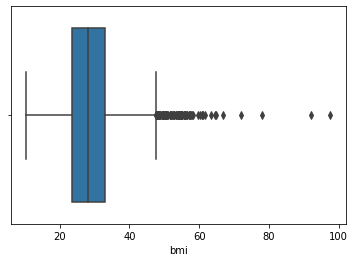

In [197]:
sns.boxplot(x='bmi', data=exp_df);

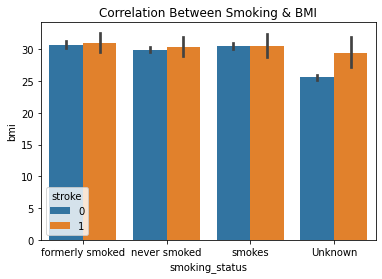

In [258]:
sns.barplot(x='smoking_status', y='bmi', data=exp_df, hue='stroke')
plt.title('Correlation Between Smoking & BMI');

**Base Model**
- In the base model, there are outliers present around the bmi mark of 45-50 and stretching to a bmi of 100.

**Combined Model**
- In the combined model of 'bmi' and 'smoking status', there are outliers present in all the different values of smoking status. These outliers all start around the bmi mark of 45-50.

---

#### **smoking_status**

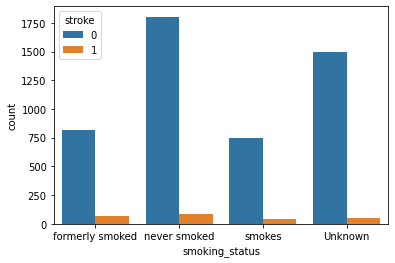

In [199]:
sns.countplot(x='smoking_status', data=exp_df, hue='stroke');

**Base Model**
- In the base model, there are no outliers present.

**Combined Model**
- In the combined model of 'smoking_status' and 'gender'. There are no outliers present, but there is only whiskers (**black line**) present in the smoking value of 'formerly smoked'.

---

#### **stroke**

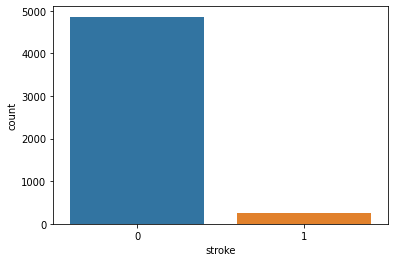

In [200]:
sns.countplot(x='stroke', data=exp_df);

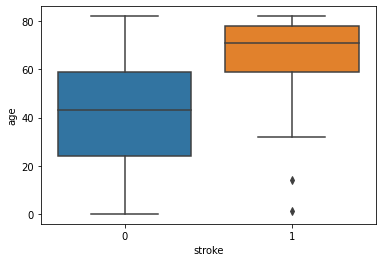

In [201]:
sns.boxplot(x='stroke', y='age', data=exp_df);

**Base Model**
- There are only outliers present in patients that have had a stroke.

**Combined Model**
- In the combined model of patients that have had a stroke and patients ages. There are only outliers present in patients that **have had a stroke and are between the ages of 20 and 0.**

---

#**Correlation Heatmap of Features and Target**

In [202]:
corr = exp_df.corr()

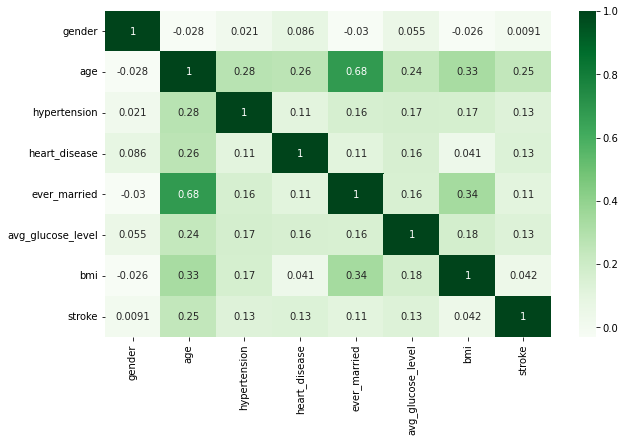

In [203]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr, cmap='Greens', annot=True);

**Medium Correlations** - There is a medium correlation between a patients' age and whether they've ever been married.

**Low Correlations** - There is a low correlation between a patients' age and their bmi. As well as a patients' bmi, and whether they've ever been married.

**Target and Features** - There is a **LOW** correlation between a patients' age and whether they've had a stroke.

**LinePlot Visualizations**

- **LinePlot 1** - Features *('age' & 'ever_married')*

- **LinePlot 2** - Target & Feature *('stroke' & 'age')*

# **Correlation Visualizations**

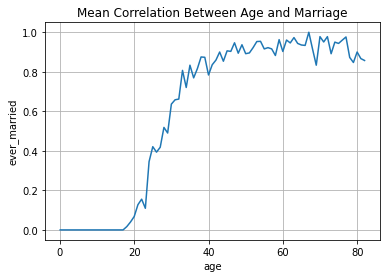

In [204]:
sns.lineplot(data=exp_df, x='age', y='ever_married', ci=None)
plt.title('Mean Correlation Between Age and Marriage')
plt.grid();

In the lineplot above we can see that:
- People begin to get married around the time they reach 18 years of age.
- Around Age 22, there is a 20% chance of people being married.
- At Age 25, that goes to 40%.
- At Age 30, the percentage is 60%
- At Age 40, nearly 80% of people are married.

- The age where nearly 100% of people are married is around age 65.

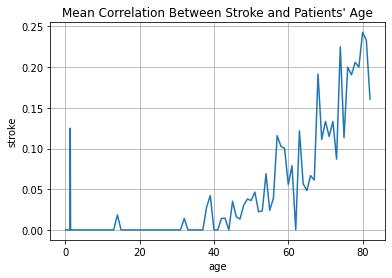

In [205]:
sns.lineplot(data=exp_df, x='age', y='stroke', ci=None)
plt.title("Mean Correlation Between Stroke and Patients' Age")
plt.grid();

In this lineplot above that draws a comparison between a patient's age and their risk of stroke. We can see:
- There is an interesting note of infantile stroke that reaches around 12.5%.
(According to **Chasa.org:** "***Risk of stroke is highest in the first year of life and peaks during the perinatal period (a few weeks before and after birth***). [SOURCE](https://chasa.org/medical/pediatric-stroke/)

- The age where a person is most at risk of having a stroke is around 80 years of age, where there is a 25% chance.
- Infantile stroke probabilities seem to match the probabilities in patients' around 60 years of age.


#**PreProcessing**



For Data Preprocessing / Machine Learning we will use the machine learning copy of the dataset provided labeled `ml_df`.

In [206]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##**ID Vector & Features**

In [207]:
# The target for this dataset is stroke so that is dropped from X and assigned to y.
X = ml_df.drop(('stroke'), axis=1)
y = ml_df['stroke']

##**Validation Split**

In [208]:
# A validation split is made to prevent data leakage.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

##**Data Type Analysis**

In [209]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


---
**Nominal Features**
- gender (object)
- hypertension (int64)
- heart_disease (int64)
- ever_married (object)
- work_type (object)
- Residence_type (object)
- smoking_status (object)

**Nominal Target**
- stroke (int64)

**Numerical Features**
- age (float64)
- avg_glucose_level (float64)
- bmi (float64)

---
In order to make column selectors, the nominal features that are currently labeled as `'int64'` will need to be changed to `'object'`

- hypertension
- heart_disease
- stroke

In [210]:
# Changing int64 nominal features to object datatypes
ml_df['hypertension'] = ml_df['hypertension'].astype(object)
ml_df['heart_disease'] = ml_df['heart_disease'].astype(object)
ml_df['stroke'] = ml_df['stroke'].astype(object)

display(ml_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


None

---
# **Column Selector**

In [226]:
# Create Column Selectors for categorical and numerical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

##**Instantiate Imputer, Scaler, OHE**

In [227]:
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

##Pipelines and Column Transformer

In [228]:
ml_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in the bmi column, this will be dealt with when using SimpleImputer

In [230]:
# Impute num pipeline to deal with missing values in bmi column
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

- OHE is used in categorical data because not all of the 'object' columns have ordered variables.
- **Ex:** '`gender`' has '`Female`', '`Male`', '`Other`'

In [235]:
cat_pipe = make_pipeline(ohe, scaler)
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('standardscaler', StandardScaler())])

## Tuple Creation & Preprocessor

In [234]:
# Creating tuples for num & categorical data
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [236]:
#Creating Preprocessor that combines everything
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b6f335a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b6f335850>)])

##Fit Preprocessor & Transform Training Data

In [238]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b6f335a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b6f335850>)])

In [239]:
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Sanity Check for Missing Values and Proper Shape

In [247]:
print(f'There are {np.isnan(X_train_preprocessed).sum()} missing values in the training data')
print(f'There are {np.isnan(X_test_preprocessed).sum()} missing values in the testing data')
print(f'All data in X_train_processed are {X_train_preprocessed.dtype} and X_test are {X_test_preprocessed.dtype}.')
print(f'There are {X_train_preprocessed.shape[0]} rows and {X_train_preprocessed.shape[1]} columns in the train dataset.')

There are 0 missing values in the training data
There are 0 missing values in the testing data
All data in X_train_processed are float64 and X_test are float64.
There are 3832 rows and 21 columns in the train dataset.
